# Linear regression in diabetes dataset

Exploremos los conjuntos de datos incluidos en esta biblioteca de Python. Estos conjuntos de datos se han limpiado y formateado para su uso en algoritmos de ML.

## Ej 1: Carga y explora el dataset diabetes de sklearn 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import math

In [3]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

## A partir de la descripción de los datos, responda a las siguientes preguntas:

1. ¿Cuántos atributos hay en los datos? ¿Qué significan?

1. ¿Cuál es la relación entre `diabetes['data']` y `diabetes['target']`?

1. ¿Cuántos registros hay en los datos?

In [4]:
#1
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [5]:
diabetes['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [6]:

df = pd.DataFrame(diabetes['data'])

In [7]:
df

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [8]:
len(df.columns)

10

In [9]:
df.dtypes


0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7    float64
8    float64
9    float64
dtype: object

In [10]:
#2
diabetes= load_diabetes(as_frame=True)

In [11]:
diabetes['data']

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [12]:
diabetes['target']

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [13]:
#3

diabetes['data'].shape

(442, 10)

Cada fila en data contiene las características de una muestra, y el valor correspondiente en target es el objetivo de regresión asociado a esa muestra. La relación entre data y target se establece a través de las observaciones individuales en el conjunto de datos.


## Ahora explora lo que contiene la parte *data* así como la parte *target* de `diabetes`. 

Scikit-learn normalmente toma arrays numpy 2D como entrada (aunque también se aceptan dataframes pandas). Inspeccione la forma de `data` y `target`. Confirme que son consistentes con la descripción de los datos.

## Realiza un EDA de los datos

In [14]:
df.dropna()

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [15]:
df.drop_duplicates()

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [16]:
df.describe()

,0,1,2,3,4,5,6,7,8,9
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


<Axes: >

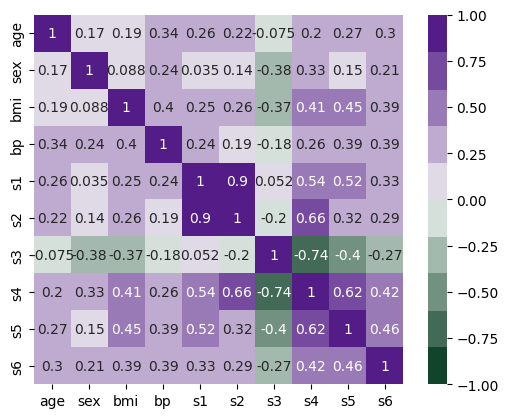

In [17]:
sns.heatmap(diabetes['data'].corr(),
            vmin=-1,
            vmax=1,
            center=0,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=10),
            square=True,
            annot=True)


In [18]:
diabetes['data']['sex']

0      0.050680
1     -0.044642
2      0.050680
3     -0.044642
4     -0.044642
         ...   
437    0.050680
438    0.050680
439    0.050680
440   -0.044642
441   -0.044642
Name: sex, Length: 442, dtype: float64

In [19]:
# Supongamos que tu conjunto de datos se llama 'sexos'
sexos_numeros = diabetes['data']['sex']

# Define un diccionario de mapeo
mapeo_sexos = {0.05068011873981862: "Femenino", -0.044641636506989144: "Masculino"}

# Mapea los números a strings usando el diccionario
sexos_strings = [mapeo_sexos[numero] for numero in sexos_numeros]

# Imprime los resultados
print(sexos_strings)


['Femenino', 'Masculino', 'Femenino', 'Masculino', 'Masculino', 'Masculino', 'Femenino', 'Femenino', 'Femenino', 'Masculino', 'Masculino', 'Femenino', 'Masculino', 'Femenino', 'Masculino', 'Femenino', 'Masculino', 'Femenino', 'Masculino', 'Masculino', 'Masculino', 'Femenino', 'Masculino', 'Femenino', 'Masculino', 'Femenino', 'Masculino', 'Masculino', 'Masculino', 'Femenino', 'Masculino', 'Masculino', 'Femenino', 'Masculino', 'Masculino', 'Femenino', 'Masculino', 'Masculino', 'Femenino', 'Femenino', 'Femenino', 'Masculino', 'Femenino', 'Masculino', 'Femenino', 'Femenino', 'Masculino', 'Masculino', 'Femenino', 'Femenino', 'Masculino', 'Femenino', 'Masculino', 'Masculino', 'Masculino', 'Masculino', 'Masculino', 'Masculino', 'Masculino', 'Femenino', 'Masculino', 'Femenino', 'Femenino', 'Masculino', 'Femenino', 'Femenino', 'Femenino', 'Femenino', 'Femenino', 'Masculino', 'Masculino', 'Masculino', 'Femenino', 'Femenino', 'Femenino', 'Femenino', 'Femenino', 'Masculino', 'Masculino', 'Masculin

In [20]:
diabetes['data']['sex'] = sexos_strings

C:\Users\puent\AppData\Local\Temp\ipykernel_19636\755118004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes['data']['sex'] = sexos_strings


In [21]:
diabetes['data']['age']

0      0.038076
1     -0.001882
2      0.085299
3     -0.089063
4      0.005383
         ...   
437    0.041708
438   -0.005515
439    0.041708
440   -0.045472
441   -0.045472
Name: age, Length: 442, dtype: float64

In [22]:
lista_edades = []
for edad in diabetes['data']['age']:
    lista_edades.append(math.fabs(edad)*1000)
lista_edades

[38.07590643342303,
 1.8820165277906047,
 85.29890629667548,
 89.0629393522567,
 5.383060374248237,
 92.69547780327612,
 45.472477940023644,
 63.50367559055897,
 41.70844488444244,
 70.90024709715959,
 96.32801625429555,
 27.178291080364758,
 16.280675727306498,
 5.383060374248237,
 45.340983335461864,
 52.737554842062494,
 5.5145549788100245,
 70.7687524925978,
 38.20740103798481,
 27.309785684926545,
 49.105016391043065,
 85.43040090123728,
 85.43040090123728,
 45.340983335461864,
 63.63517019512076,
 67.26770864614018,
 107.22563160735379,
 23.677247233907128,
 52.6060602375007,
 67.13621404157838,
 60.002631744101336,
 23.677247233907128,
 34.4433679824036,
 30.81082953138418,
 16.280675727306498,
 48.973521786481285,
 12.648137276287077,
 9.147093429829445,
 1.8820165277906047,
 1.8820165277906047,
 5.383060374248237,
 99.96055470531495,
 60.002631744101336,
 19.91321417832592,
 45.340983335461864,
 27.178291080364758,
 56.370093293081915,
 78.16532399919842,
 67.13621404157838,
 

In [23]:
# edad_real = [edad * 1000 for edad in diabetes['data']['age'].abs()]
#edad_real

In [24]:
diabetes['data']['age'] = lista_edades

C:\Users\puent\AppData\Local\Temp\ipykernel_19636\172733686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes['data']['age'] = lista_edades


In [25]:
diabetes['data'].sort_values(by='age', ascending=True)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
364,1.750522,Femenino,-0.006206,-0.019442,-0.009825,0.004949,-0.039719,0.034309,0.014821,0.098333
98,1.750522,Femenino,-0.005128,-0.012556,-0.015328,-0.013840,0.008142,-0.039493,-0.006081,-0.067351
424,1.750522,Femenino,0.011039,-0.019442,-0.016704,-0.003819,-0.047082,0.034309,0.024055,0.023775
255,1.750522,Masculino,-0.065486,-0.005670,-0.007073,-0.019476,0.041277,-0.039493,-0.003301,0.007207
168,1.750522,Femenino,0.059541,-0.002228,0.061725,0.063195,-0.058127,0.108111,0.068986,0.127328
...,...,...,...,...,...,...,...,...,...,...
344,107.225632,Masculino,-0.011595,-0.040099,0.049341,0.064447,-0.013948,0.034309,0.007027,-0.030072
374,107.225632,Masculino,-0.034229,-0.067642,-0.063487,-0.070520,0.008142,-0.039493,-0.000612,-0.079778
26,107.225632,Masculino,-0.077342,-0.026328,-0.089630,-0.096198,0.026550,-0.076395,-0.042571,-0.005220
204,110.726675,Femenino,0.006728,0.028758,-0.027712,-0.007264,-0.047082,0.034309,0.002004,0.077622


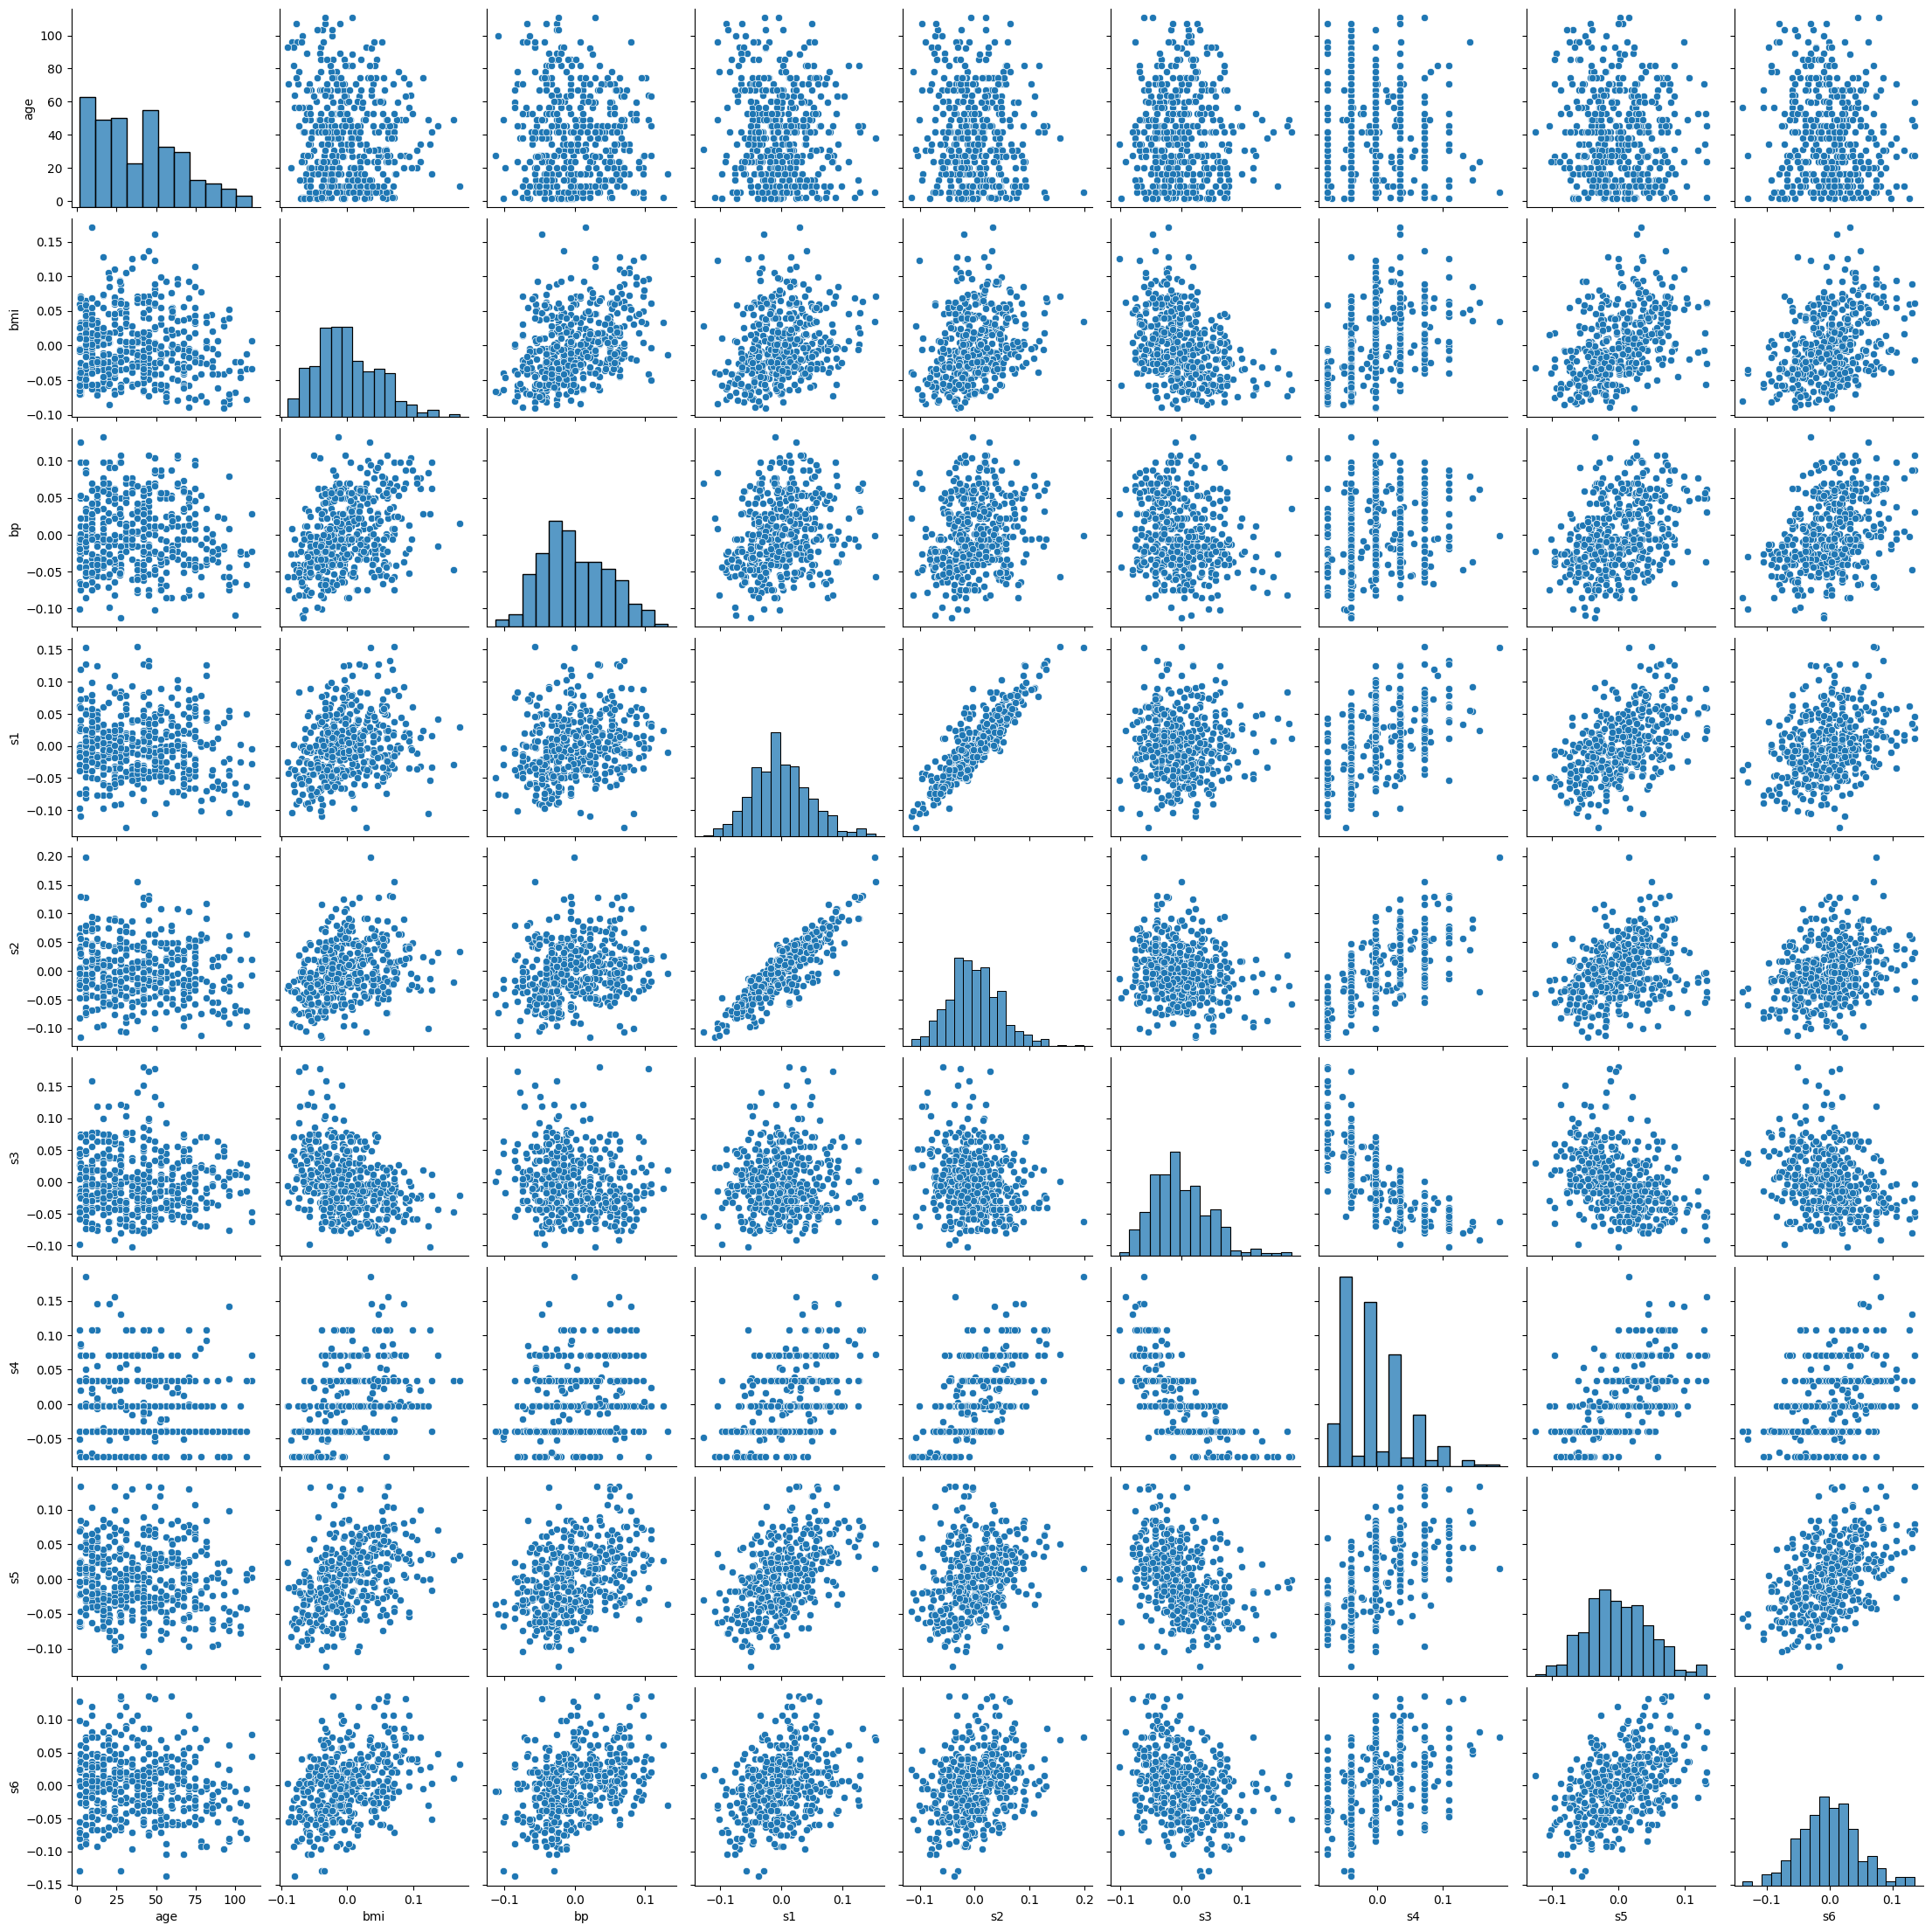

In [26]:
sns.pairplot(diabetes['data'])

## Construye un modelo 

1. Crea un modelo de regresión lineal.
2. Parte los datos en conjuntos de entrenamiento y test. Usa las ultimas 20 filas para los datos de test.
3. Entrena el modelo. Muestra los parametros del modelo.
4. Realiza una predicción con los datos de test

In [27]:
# 1. Crea un modelo de regresión lineal
modelo_regresion = LinearRegression()

In [28]:
# 2. Divide los datos en conjuntos de entrenamiento y prueba (usando las últimas 20 filas para prueba)
    # Cargar el conjunto de datos de diabetes
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

    # Utilizar solo una característica
diabetes_X = diabetes_X[:, np.newaxis, 2]

    # Dividir los datos en conjuntos de entrenamiento/prueba
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

    # Dividir los objetivos en conjuntos de entrenamiento/prueba
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [29]:
# 3. Entrenar el modelo
modelo_regresion.fit(diabetes_X_train, diabetes_y_train)

# Mostrar los parámetros del modelo
print(f"Coeficientes del modelo: {modelo_regresion.coef_}")
print(f"Intercepto del modelo: {modelo_regresion.intercept_}")

Coeficientes del modelo: [938.23786125]
Intercepto del modelo: 152.91886182616113


In [30]:
# 4. Realizar una predicción con los datos de prueba
diabetes_y_pred = modelo_regresion.predict(diabetes_X_test)
diabetes_y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

##  Pinta las predicciones y comparalas con los datos de test

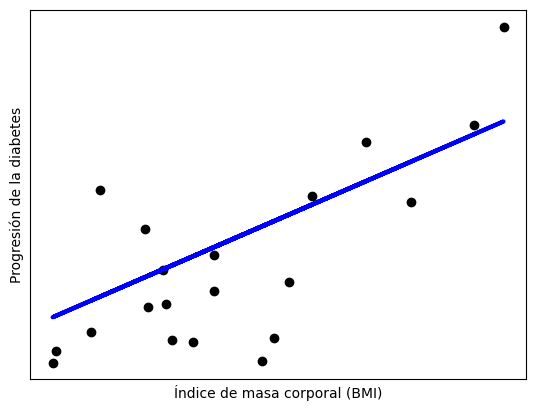

In [31]:
# Visualizar los resultados en un gráfico de dispersión y la línea de regresión
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())
plt.xlabel("Índice de masa corporal (BMI)")
plt.ylabel("Progresión de la diabetes")
plt.show()

## Calcula y visualiza los errores

In [34]:
# Imprimimos los coeficientes de la regresión
#modelo_regresion = modelo_regresion.coef_
print("Coeficientes: \n", modelo_regresion)

# Mostramos el coeficiente de determinación (R^2)
r2 = r2_score(diabetes_y_test, diabetes_y_pred)
print("Coeficiente de determinación: %.2f" % r2)

# Calculamos el Mean Squared Error (MSE)
mse = mean_squared_error(diabetes_y_test, diabetes_y_pred)
print("Error cuadrático medio (MSE): %.2f" % mse)

# Calculamos el Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Raíz del Error Cuadrático Medio (RMSE): %.2f" % rmse)



Coeficientes: 
 [938.23786125]
Coeficiente de determinación: 0.47
Error cuadrático medio (MSE): 2548.07
Raíz del Error Cuadrático Medio (RMSE): 50.48
